<h1 style="text-align: center;">Introduction to Modern Mathematical Modeling with R:</h1>
<h2 style="text-align: center;">A User's Manual to Train Mathematical Consultants<br></h2>

<h3 style="text-align: center;">A Cambridge University Press book</h3>
<h3 style="text-align: center;">by SSP Shen<br><br></h3>

<p style="text-align: center;">Compiled and Edited by Joaquin Stawsky</p>
<p style="text-align: center;">Momtaza Sayd Contributed to this Version of the Code</p>
<p style="text-align: center;">San Diego State University, August 2024</p>

## Chapter 9: Visualize Mathematical Models By R
### Plot Two Different Time Series on the Same Plot

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import cartopy as ctp
import netCDF4 as nc
import os
from matplotlib import cm as cm1
from matplotlib.colors import ListedColormap, to_rgba
from matplotlib.colors import LinearSegmentedColormap
import warnings

In [37]:
styledict = {'xtick.labelsize':25,
             'xtick.major.size':9,
             'xtick.major.width':1,
             'ytick.labelsize':25,
             'ytick.major.size':9,
             'ytick.major.width':1,
             'legend.framealpha':0.0,
             'legend.fontsize':15,
             'axes.labelsize':20,
             'axes.titlesize':25,
             'axes.linewidth':2,
             'figure.figsize':(12,8),
             'savefig.format':'jpg'}

plt.rcParams.update(**styledict)

In [38]:
time = np.arange(2001,2011)
Tmean = np.array([12.06, 11.78, 11.81, 11.72, 12.02,
                  12.36, 12.03, 11.27, 11.33, 11.66])
Prec = np.array([737.11, 737.87, 774.95, 844.55, 764.03,
                 757.43, 741.17, 793.50, 820.42, 796.80])

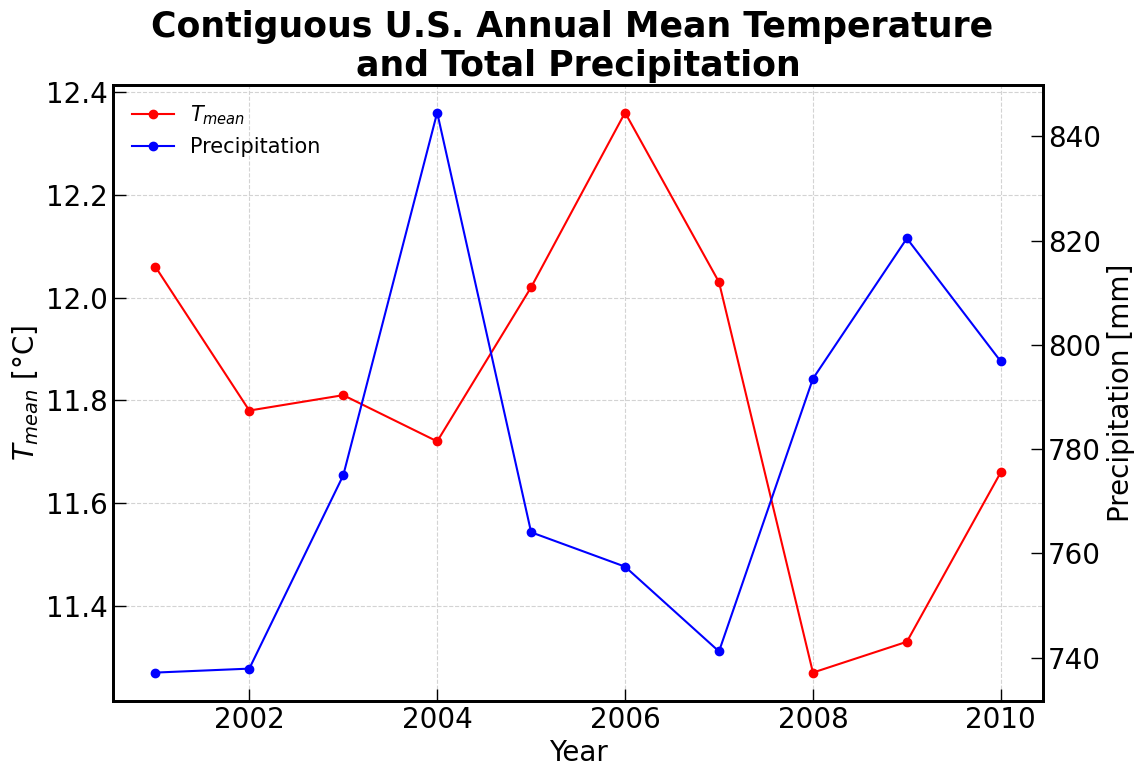

In [39]:
#Figure 9.1
fig, ax = plt.subplots(1,1,figsize=(12, 8))

ax.plot(time, Tmean, 'o-r', label="$T_{mean}$")
ax.set_ylabel("$T_{mean}$ [$\degree$C]",size=20)
ax.set_xlabel("Year",size=20)
ax.set_title("Contiguous U.S. Annual Mean Temperature \nand Total Precipitation", 
             size=25,fontweight="bold")

ax1 = ax.twinx()

ax1.plot(time, Prec, 'o-b', label="Precipitation")
ax1.set_ylabel("Precipitation [mm]",size=20)
ax1.tick_params(labelsize=20)
ax.grid(linestyle="dashed",color="lightgrey")

hand1, lab1 = ax.get_legend_handles_labels()
hand2, lab2 = ax1.get_legend_handles_labels()

ax.legend(handles=hand1+hand2, labels=lab1+lab2,
          loc='upper left');

ax1.tick_params(direction='in')
ax.tick_params(direction='in',labelsize=20)

plt.savefig("CH9;ContiguousAnnualTemp.jpg", bbox_inches='tight')

### Figure setups: Margins, Fonts, Mathematical Symbols, and More

In [40]:
x = 0.25*np.arange(-30, 31)

yPositive = np.where(np.sin(x) > 0)[0]
yNegative = np.where(np.sin(x) < 0)[0]

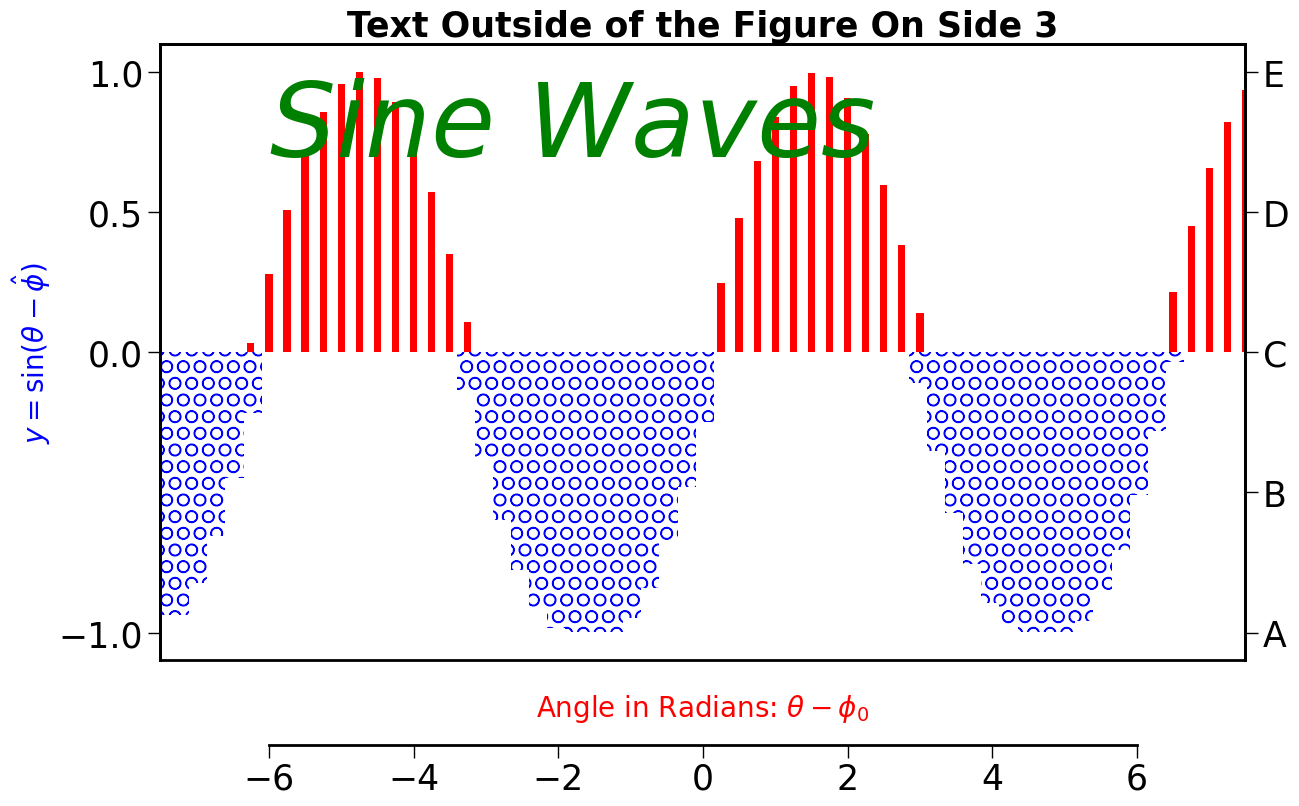

In [41]:
#Figure 9.2
fig, ax = plt.subplots(figsize=(14,8))
plt.rcParams['hatch.color'] = 'blue'

ax.bar(x[yPositive], np.sin(x[yPositive]), width=.1, color='red')
ax.bar(x[yNegative], np.sin(x[yNegative]), hatch='O', fc='white')
ax.text(-6, .7, "$Sine\ Waves$", size=75, color='green')
ax.set_xlabel(r"Angle in Radians: $\theta - \phi_0$", color='red',
              labelpad=-75)
ax.set_xticks([2*i for i in range(-3, 4)])
ax.set_xlim(x.min(), x.max())
ax.set_ylabel(r"$y = \sin(\theta - \hat{\phi})$", color='blue')
ax.set_yticks([-1., 0., .5, 1.])
ax.spines['bottom'].set_position(('data',-1.4))
ax.spines['bottom'].set_bounds(-6,6)

ax1 = ax.twinx()
ax1.plot(x, np.sin(x), alpha=0)
ax1.set_yticks([-1., -.5, 0., .5, 1.])
ax1.set_yticklabels(['A', 'B', 'C', 'D', 'E'])
ax1.tick_params(width=1, length=9)
ax1.set_title("Text Outside of the Figure On Side 3", 
              size=25,fontweight="bold")

fig.savefig("CH9;PlotFunDemo.jpg", bbox_inches='tight')

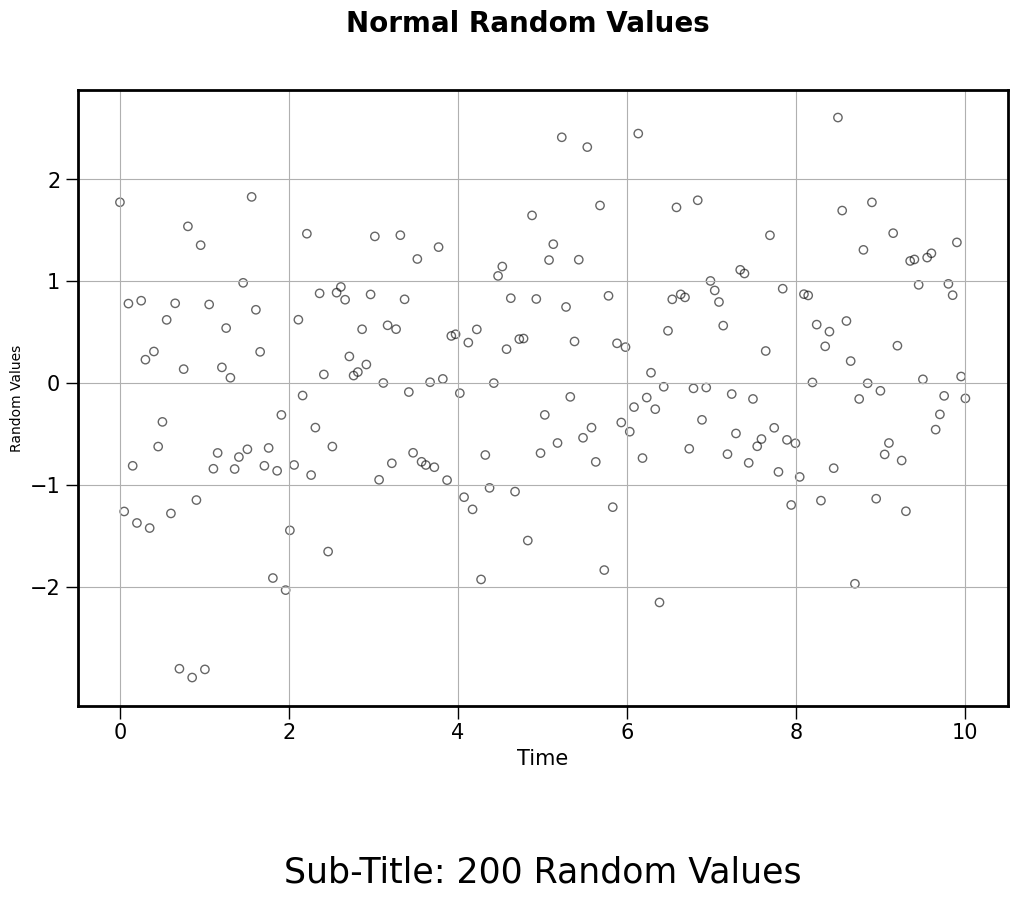

In [42]:
randVals = np.random.standard_normal(200)

#Figure 9.3
fig, ax = plt.subplots(1)
fig.suptitle("Normal Random Values", size=20,fontweight="bold")

ax.scatter(np.linspace(0, 10, randVals.size), randVals, alpha=.6,
           edgecolor='black',color="none")
ax.set_title("Sub-Title: 200 Random Values", y=-.3)
ax.set_ylabel("Random Values",size=10)
ax.set_yticks([i for i in range(-2, 3)])
ax.set_xlabel("Time",size=15)
ax.tick_params(labelsize=15)
ax.grid()

fig.savefig("CH9;200Randoms.jpg", bbox_inches='tight')

In [43]:
os.chdir('/Users/momtaza/Desktop/RMathModel/data')
NOAATemp = np.loadtxt("aravg.ann.land_ocean.90S.90N.v4.0.1.2016.txt",skiprows=0)

# set up variables
x = NOAATemp[:,0]
y = NOAATemp[:,1]
z = [-99] * x.size

In [44]:
def forz(z,y):
    for i in range(2,134):
        
        rslt = [(y[i-2],y[i-1],y[i],y[i+1],y[i+2])]
        z[i] = np.mean(rslt)
    return z

def n1func():
    n1 = []
    for i in range(0,137):
        if y[i] >= 0:
            n1.append(i)
    return n1

def n2func():
    n2 = []
    for i in range(0,137):
        if y[i] < 0:
            n2.append(i)
    return n2

zz = forz(z,y)
n1 = n1func()
n2 = n2func()

x1 = x[n1]
y1 = y[n1]
x2 = x[n2]
y2 = y[n2]
x3 = x[2:134]
y3 = z[2:134]

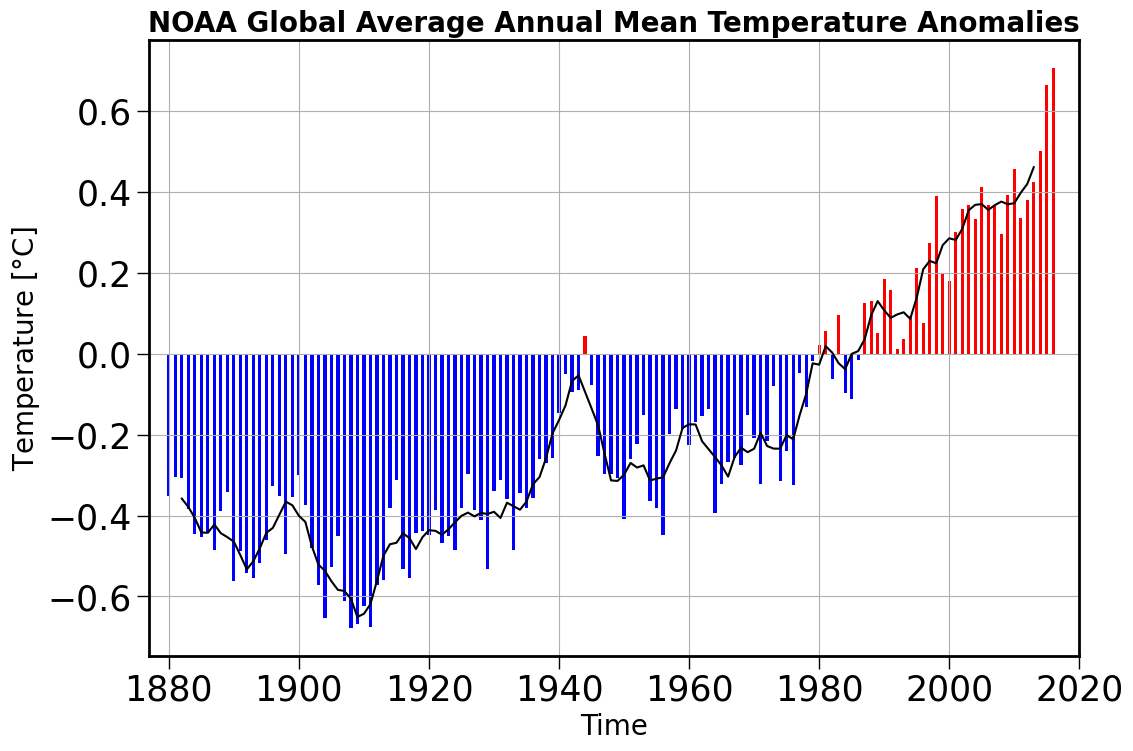

In [45]:
#Fig 9.4
# fancy plot of the NOAAGlobalTemp time series
plt.bar(x1,y1,color='r', width=0.5)
plt.bar(x2,y2,color='b', width=0.5)
plt.plot(x3,y3,color='k')
plt.xlim(1877,2020)

plt.xlabel('Time')
plt.ylabel('Temperature [$\degree$C]')
plt.title('NOAA Global Average Annual Mean Temperature Anomalies', fontweight="bold", size=20)
plt.grid()
plt.show()

#fig.savefig("NOAA_GAAMTA.jpg", bbox_inches='tight')

### Plot Two or More Panels on the Same Figure

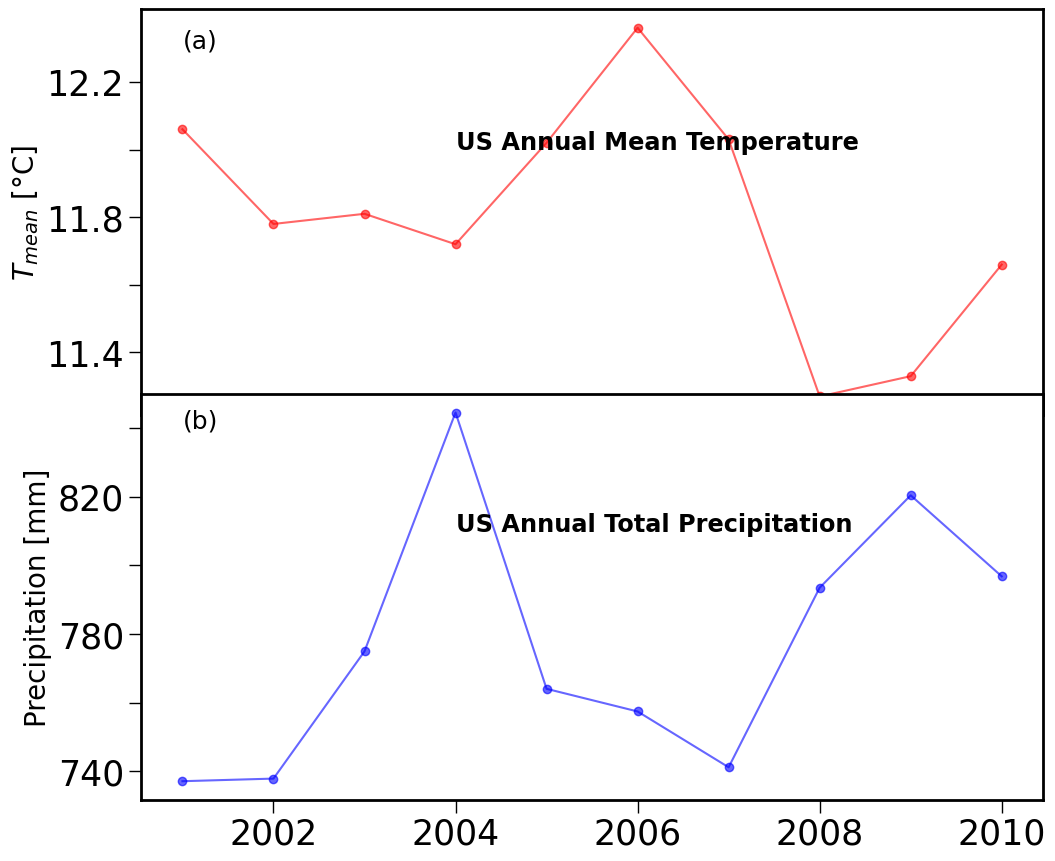

In [66]:
#Fig 9.5
# Contiguous United States (a) annual mean temperature and (b) annual total precipitation 

# plot the US temp and prec time series on the same figure 
fig, ax = plt.subplots(2,1, figsize=(10,8))

# add additional axis 
ax[0].axes.get_xaxis().set_visible(False)

# plot first subplot data
ax[0].plot(time, Tmean, 'ro-', alpha=.6, label="(a)")

ax[0].set_yticks([11.4, np.mean([11.4, 11.8]), 11.8
                  , np.mean([11.8, 12.2]), 12.2])
ax[0].set_yticklabels([11.4, None, 11.8, None, 12.2])
ax[0].set_ylabel("$T_{mean}$ [$\degree$C]")
ax[0].text(2004,12.0,"US Annual Mean Temperature"
           , fontsize = "xx-large", fontweight="bold")

ax[0].text(2001,12.3,"(a)", size=18)

# plot second subplot data 
ax[1].plot(time, Prec, 'bo-', alpha=.6, label="(b)")

ax[1].text(2004,810,"US Annual Total Precipitation"
           , fontsize = "xx-large", fontweight="bold")
plt.ylabel("Precipitation [mm]")
ax[1].set_yticks([740, 760, 780, 800, 820, 840])
ax[1].set_yticklabels([740, None, 780, None, 820, None])

#set labels 
plt.text(2001,840,"(b)", size=18)

# ensures no overlap in plots 
fig.tight_layout(pad=-1.5)

# show plot
fig.show()

In [67]:
x, y = np.linspace(-1, 1, 25), np.linspace(-1, 1, 25)
z = np.random.standard_normal(size=(25,25))

def newColMap(colors):
    """
    This function creates a new color map from a list of colors given
    as a parameter. Recommended length of list of colors is at least 6.
    """
    first = np.repeat([to_rgba(colors[0])], 2, axis = 0)
    last = np.repeat([to_rgba(colors[-1])], 2, axis = 0)
    v = cm1.get_cmap('viridis', 16*(len(colors)-2))
    newcolors = v(np.linspace(0, 1, 16*(len(colors)-2)))
    for (i, col) in enumerate(colors[1:-1]):
        newcolors[16*i : 16*(i+1), :] = to_rgba(col)
    return ListedColormap(np.append(np.append(first,newcolors, axis=0), last, axis=0))

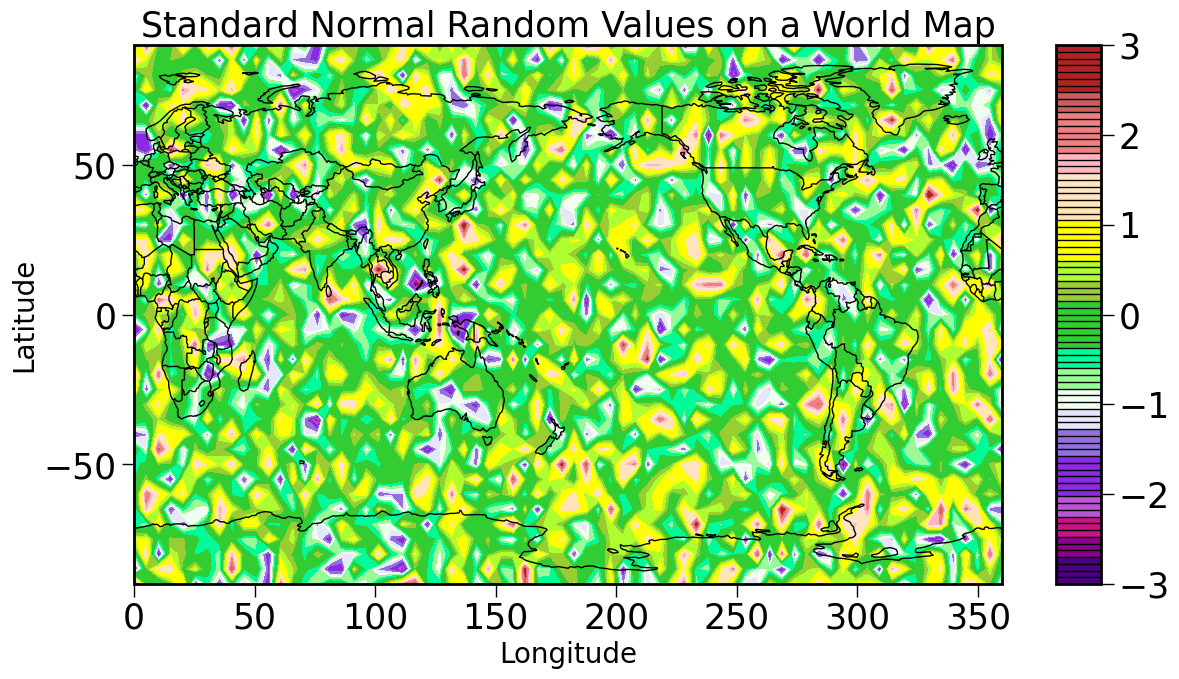

In [70]:
warnings.filterwarnings("ignore")
#Fig 9.6
# plot a 5-by-5 grid of global map of standard normal random values
# set up variables
lat = np.linspace(-90, 90, 37)
lon = np.linspace(0, 360, 72)

# create data to be plotted 
mapmat = np.random.standard_normal(size=(lat.size, lon.size))

levels = np.linspace(-3, 3, 81)

# set up figure 
fig, ax = plt.subplots(figsize=(14, 7), subplot_kw={'projection': ctp.crs.PlateCarree(central_longitude=180)})
ax.coastlines()
ax.add_feature(ctp.feature.BORDERS)
ax.set_global()
ax.set_title("Standard Normal Random Values on a World Map")

# create desired Colormap 
colors = ["darkred","firebrick","firebrick","indianred","lightcoral","lightcoral","lightpink"
          ,"bisque","moccasin","yellow","yellow","greenyellow","yellowgreen","limegreen","limegreen"
          ,"mediumspringgreen","palegreen","honeydew","lavender","mediumpurple",
         "blueviolet","blueviolet","mediumorchid","mediumvioletred","darkmagenta","indigo","black"]
colors.reverse()
myColMap = newColMap(colors)

# plot data
contf = ax.contourf(lon-180, lat, mapmat, levels, cmap=myColMap)

# add labels and colorbar
colbar = plt.colorbar(contf, drawedges=True, aspect=12)
colbar.set_ticks([i for i in range(-3, 4)])
ax.set_aspect('auto')

ax.set_xticks([0, 50, 100, 150, 200, 250, 300, 350]
              ,crs=ctp.crs.PlateCarree())
ax.set_xticklabels([0, 50, 100, 150, 200, 250, 300, 350])
ax.set_xlabel("Longitude")

ax.set_yticks([-50, 0, 50], crs= ctp.crs.PlateCarree())
ax.set_ylabel("Latitude")

# show plot 
fig.show()
# fig.savefig("RandomValsonWorldMap.jpg", bbox_inches='tight');

In [54]:
NAlat = np.linspace(10, 70, 13)
NAlon = np.linspace(230, 295, 14)
NAmat = np.random.standard_normal(size=(NAlat.size,NAlon.size))

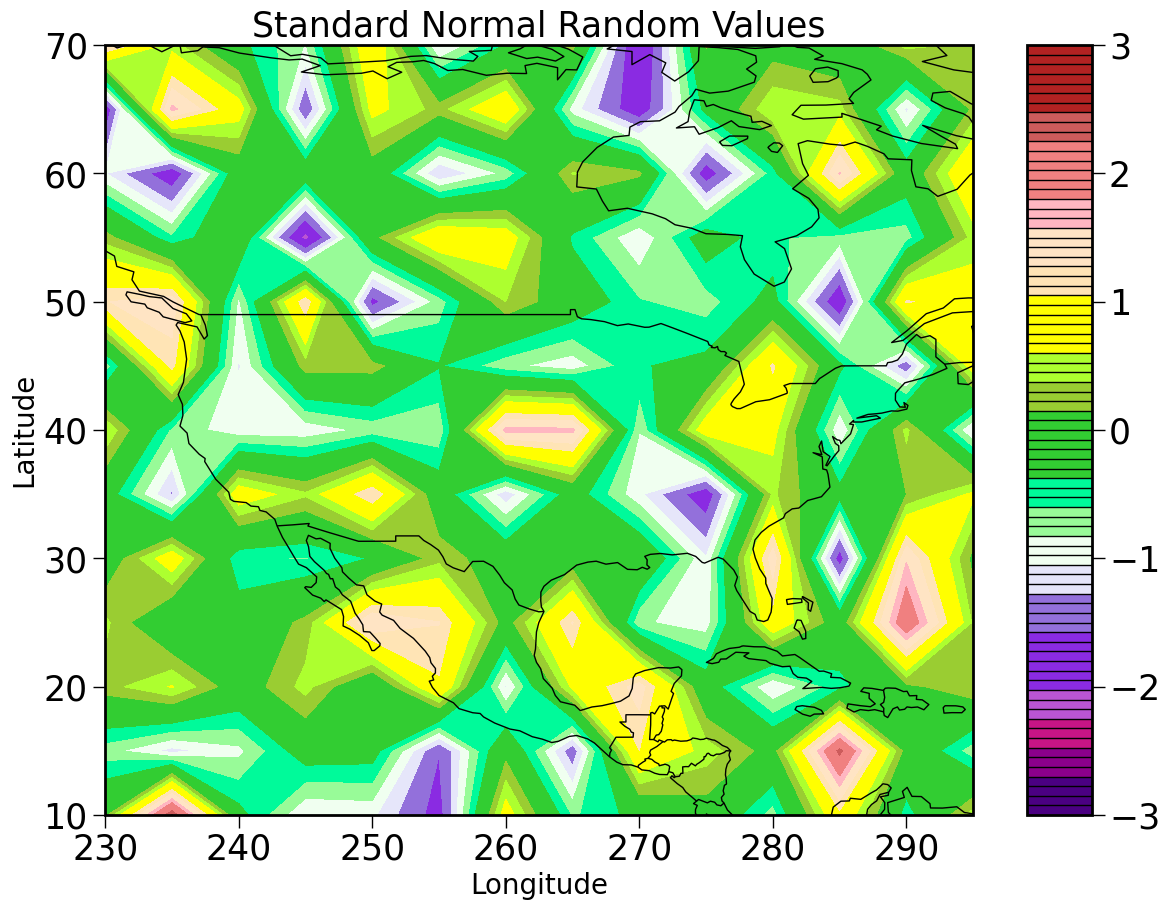

In [71]:
#Fig 9.7
# plot a 5-by-5 grid regional map to cover USA and Canada 
# set up variables 
lat3 = np.linspace(10, 70, 13)
lon3 = np.linspace(230, 295, 14)
mapdat = np.random.standard_normal(size=(lat3.size,lon3.size))

# set up figure
fig, ax = plt.subplots(figsize=(14,10), subplot_kw={'projection': ctp.crs.PlateCarree()})

ax.set_extent([230, 295, 10, 65])
ax.coastlines()
ax.add_feature(ctp.feature.BORDERS)
ax.set_title("Standard Normal Random Values")

# plot data 
contf = ax.contourf(lon3, lat3, mapdat, levels, cmap=myColMap)

# add colorbar and labels 
colbar = plt.colorbar(contf, drawedges=True, aspect=12)
colbar.set_ticks([i for i in range(-3, 4)])
ax.set_aspect('auto')

ax.set_yticks([10*i for i in range(1, 8)],crs=ctp.crs.PlateCarree())
ax.set_ylabel("Latitude")

ax.set_xticks([10*i for i in range(-13, -6)], crs=ctp.crs.PlateCarree())
ax.set_xticklabels([10*i for i in range(23,30)])
ax.set_xlabel("Longitude")

ax.tick_params(length=9)

# show plot 
fig.show()

#fig.savefig("RandomValsonNorthAmerca.jpg", bbox_inches='tight');

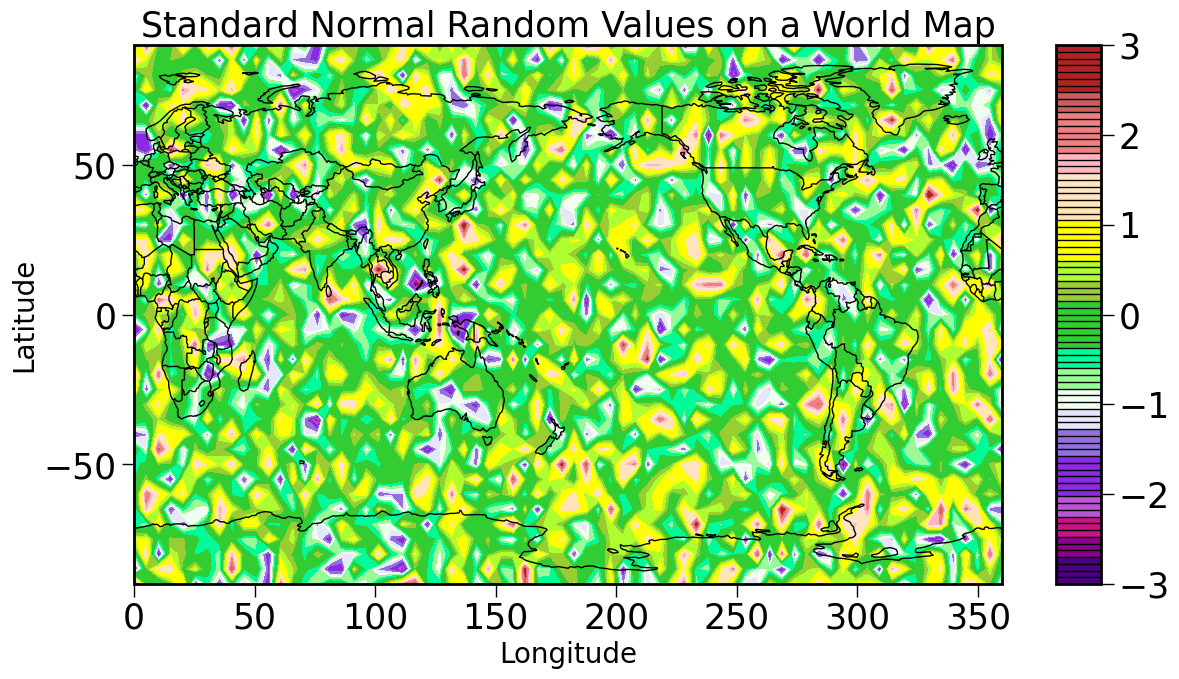

In [ ]:
warnings.filterwarnings("ignore")
#Fig 9.6
# plot a 5-by-5 grid of global map of standard normal random values
# set up variables
lat = np.linspace(-90, 90, 37)
lon = np.linspace(0, 360, 72)

# create data to be plotted 
mapmat = np.random.standard_normal(size=(lat.size, lon.size))

levels = np.linspace(-3, 3, 81)

# set up figure 
fig, ax = plt.subplots(figsize=(14, 7), subplot_kw={'projection': ctp.crs.PlateCarree(central_longitude=180)})
ax.coastlines()
ax.add_feature(ctp.feature.BORDERS)
ax.set_global()
ax.set_title("Standard Normal Random Values on a World Map")

# create desired Colormap 
colors = ["darkred","firebrick","firebrick","indianred","lightcoral","lightcoral","lightpink"
          ,"bisque","moccasin","yellow","yellow","greenyellow","yellowgreen","limegreen","limegreen"
          ,"mediumspringgreen","palegreen","honeydew","lavender","mediumpurple",
         "blueviolet","blueviolet","mediumorchid","mediumvioletred","darkmagenta","indigo","black"]
colors.reverse()
myColMap = newColMap(colors)

# plot data
contf = ax.contourf(lon-180, lat, mapmat, levels, cmap=myColMap)

# add labels and colorbar
colbar = plt.colorbar(contf, drawedges=True, aspect=12)
colbar.set_ticks([i for i in range(-3, 4)])
ax.set_aspect('auto')

ax.set_xticks([0, 50, 100, 150, 200, 250, 300, 350]
              ,crs=ctp.crs.PlateCarree())
ax.set_xticklabels([0, 50, 100, 150, 200, 250, 300, 350])
ax.set_xlabel("Longitude")

ax.set_yticks([-50, 0, 50], crs= ctp.crs.PlateCarree())
ax.set_ylabel("Latitude")

# show plot 
fig.show()
# fig.savefig("RandomValsonWorldMap.jpg", bbox_inches='tight');

### Read .nc File

In [56]:
datamat = nc.Dataset("air.mon.mean.nc")
datamat

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    description: Data from NCEP initialized reanalysis (4x/day).  These are the 0.9950 sigma level values
    platform: Model
    Conventions: COARDS
    NCO: 20121012
    history: Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc air.mon.mean.nc
Thu May  4 18:11:50 2000: ncrcat -d time,0,622 /Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc ./surface/air.mon.mean.nc
Mon Jul  5 23:47:18 1999: ncrcat ./air.mon.mean.nc /Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc /dm/dmwork/nmc.rean.ingest/combinedMMs/surface/air.mon.mean.nc
/home/hoop/crdc/cpreanjuke2farm/cpreanjuke2farm Mon Oct 23 21:04:20 1995 from air.sfc.gauss.85.nc
created 95/03/13 by Hoop (netCDF2.3)
Converted to chunked, deflated non-packed NetCDF4 2014/09
    title: monthly mean air.sig995 from the NCEP Reanalysis
    References: http://www.esrl.noaa.gov/psd/dat

In [57]:
Lon = datamat.variables['lon'][:]
Lat = datamat.variables['lat'][:]
Time = datamat.variables['time']
precnc = datamat.variables['air']
type(Lon)

numpy.ma.core.MaskedArray

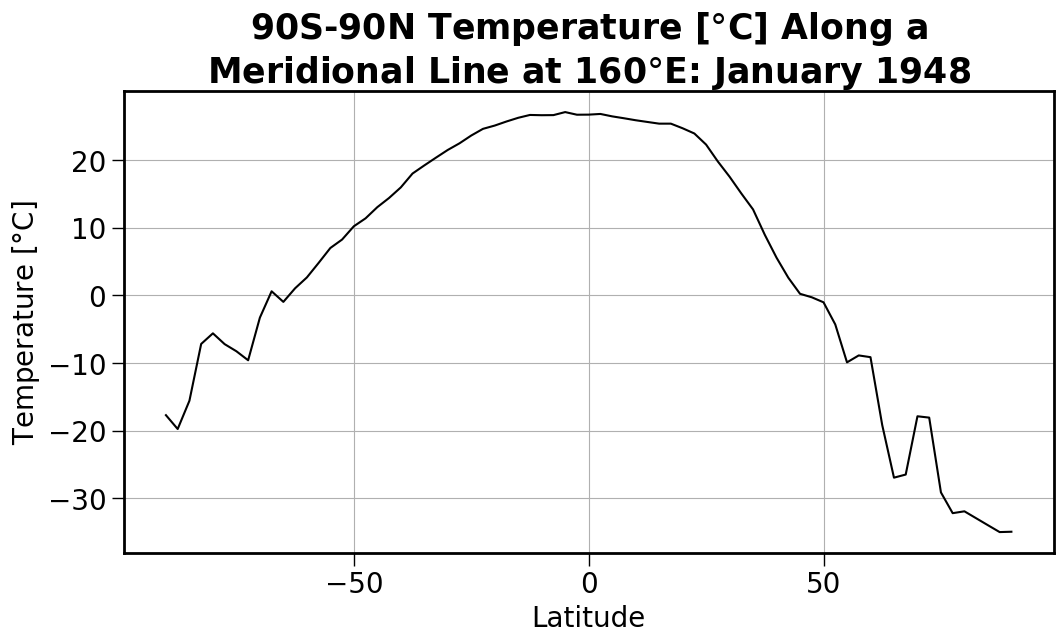

In [58]:
#Figure 9.8
fig, ax = plt.subplots(1, figsize=(12,6))

ax.plot(np.linspace(90, -90, precnc.shape[1]), precnc[0, :, 64], '-k')
ax.set_ylabel("Temperature [$\degree$C]",size=20)
ax.set_yticks([10*i for i in range(-3, 3)])
ax.set_xlabel("Latitude",size=20)
ax.set_xticks([-50, 0, 50])
ax.set_title("90S-90N Temperature [$\degree$C] Along a\n"
             "Meridional Line at 160$\degree$E: January 1948"
             ,fontweight="bold")
ax.tick_params(length=9, width=1,labelsize=20)
ax.grid()

#fig.savefig("MeridionalTemp.jpg", bbox_inches='tight');

In [59]:
JanMons = precnc[12*np.arange(68)]
sdmat = np.std(precnc, axis=0)
climmat = np.mean(JanMons, axis=0)
levels1 = np.linspace(-50, 50, 81)
levels2 = np.linspace(0, 20, 81)

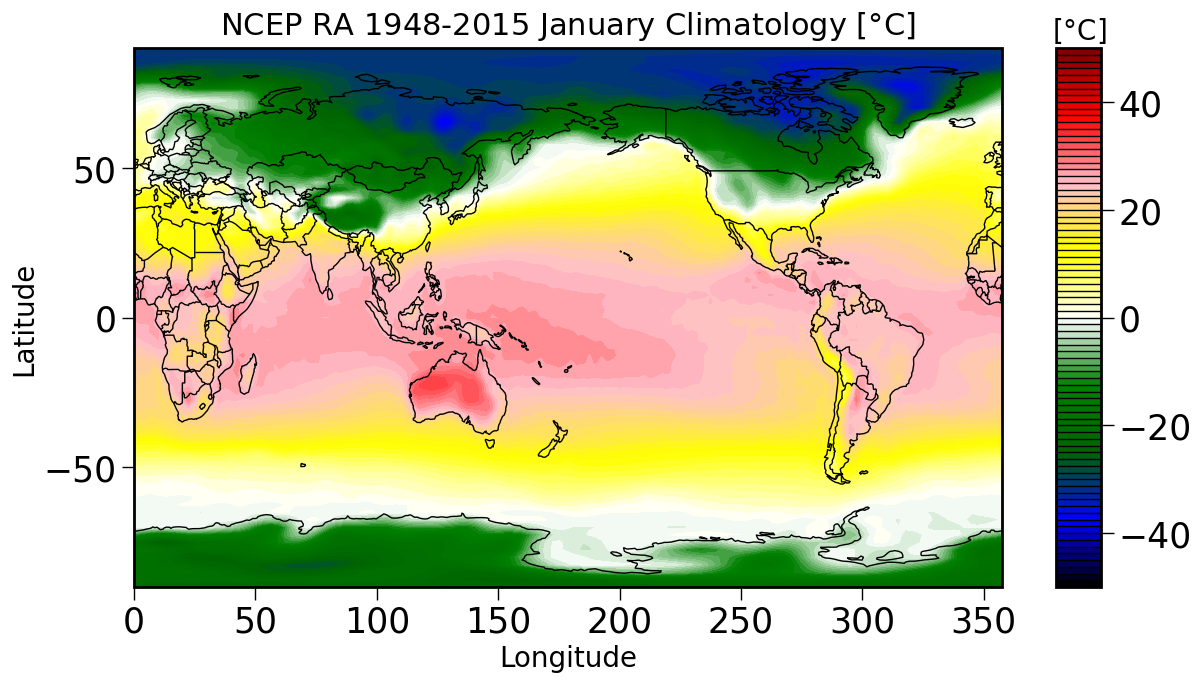

In [72]:
#Fig 9.9(a)
#Compute and plot climatology and standard deviation from Jan 1984 to Dec 2015

# set up variables for map
# number of colors that correspond to data values
contour_levels = np.linspace(-50,50,81)

# create color palette
myColMap = LinearSegmentedColormap.from_list(name='my_list', colors=['black','blue','darkgreen',
                                            'green','white','yellow','pink','red','maroon'], N=256)

JMon = precnc[12*np.arange(67)]
sdmat = np.std(precnc, axis=0)
climmat = np.mean(JMon, axis=0)
levels1 = np.linspace(-50, 50, 81)
levels2 = np.linspace(0, 20, 81)

# set up figure
fig, ax = plt.subplots(figsize=(14,7), subplot_kw={'projection':ctp.crs.PlateCarree(central_longitude=180) })

ax.coastlines()
ax.add_feature(ctp.feature.BORDERS, edgecolor='black')
ax.set_title("NCEP RA 1948-2015 January Climatology [$\degree$C]", size = 22, pad = 10)

# plot data
contf = ax.contourf(Lon-180, Lat, climmat, levels1, cmap=myColMap)

# add colorbar and labels
colbar = plt.colorbar(contf, drawedges=True, aspect=12, ticks=[])
colbar.set_ticks([20*i for i in range(-2, 3)])
ax.set_aspect('auto')

ax.set_yticks([50*i for i in range(-1, 2)],crs=ctp.crs.PlateCarree())
ax.set_ylabel("Latitude")

ax.set_xticks([50*i for i in range(8)], crs=ctp.crs.PlateCarree())
ax.set_xticklabels([50*i for i in range(8)])
ax.set_xlabel("Longitude")

ax.tick_params(length=9, width=1)
plt.text(198, 93, "[$\degree$C]", size=20)

# show plot 
fig.show()

#fig.savefig("JanuaryClimatology.jpg", bbox_inches='tight');

Text(198, 93, '[$\\degree$C]')

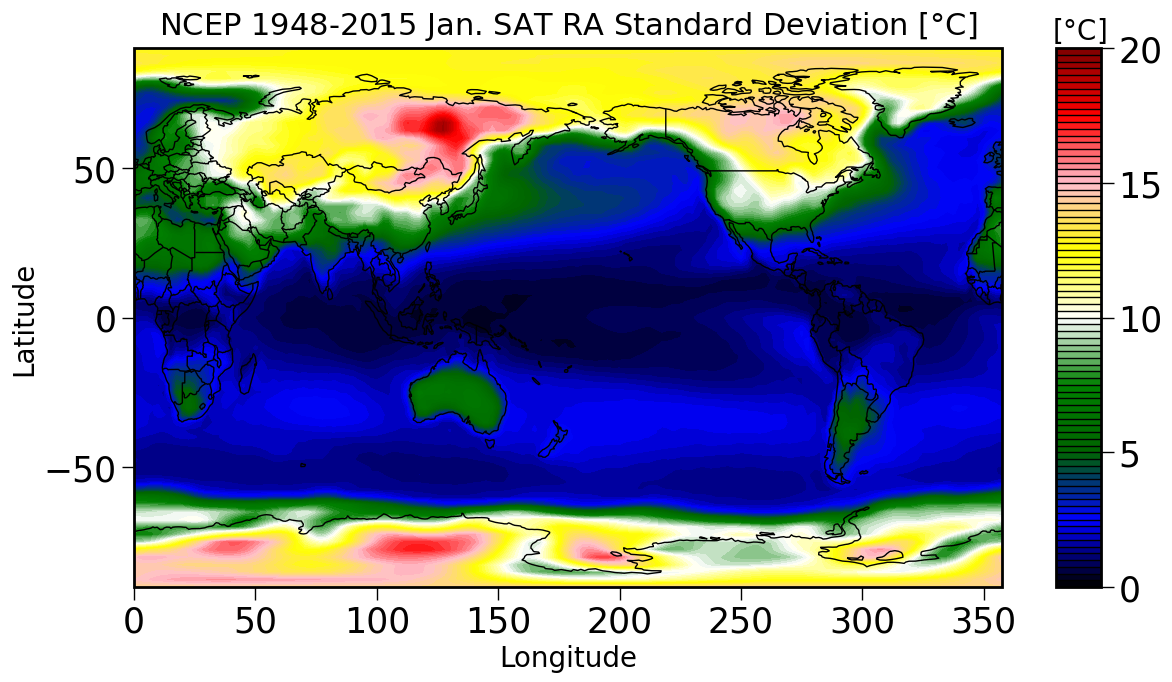

In [76]:
#Fig 9.9(b)
# plot the standard deviation
# set up figure 
fig, ax = plt.subplots(figsize=(14,7), subplot_kw={'projection':ctp.crs.PlateCarree(central_longitude=180) })

ax.coastlines()
ax.add_feature(ctp.feature.BORDERS, edgecolor='black')
ax.set_title("NCEP 1948-2015 Jan. SAT RA Standard Deviation [$\degree$C]",size = 22, pad = 10)

# plot data
contf = ax.contourf(Lon-180, Lat, sdmat, levels2, cmap=myColMap)

# add colorbar and labels
colbar = plt.colorbar(contf, drawedges=True, aspect=12)
colbar.set_ticks([5*i for i in range(5)])
ax.set_aspect('auto')

ax.set_yticks([50*i for i in range(-1, 2)],crs=ctp.crs.PlateCarree())
ax.set_ylabel("Latitude")

ax.set_xticks([50*i for i in range(8)], crs=ctp.crs.PlateCarree())
ax.set_xticklabels([50*i for i in range(8)])
ax.set_xlabel("Longitude")

ax.tick_params(length=9, width=1)
plt.text(198, 93, "[$\degree$C]", size=20)

# show and save figure 
#fig.savefig("JanuarySTD.jpg", bbox_inches='tight');